In [ ]:
# 한글 불러옴
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,909 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and dire

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family='NanumGothic')

# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_car_own = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/소현_유동인구 상권 및 시설 위치/자동차 소유/서울시 행정동별 자동차 등록대수 현황.csv',
                         encoding='euc-kr')
df_car_own.head()

,사용본거지 시군구,읍면동 (행정동),연료,계,관용_승용,관용_승합,관용_화물,관용_특수,자가용_승용,자가용승합,자가용화물,자가용특수,영업용_승용,영업용승합,영업용화물,영업용특수
0,서울특별시 종로구,종로구 기타,휘발유,1.0,0,0,0,0,0,1,0,0,0,0,0,0
1,서울특별시 종로구,종로구 기타,휘발유,2.0,0,0,0,0,0,2,0,0,0,0,0,0
2,서울특별시 종로구,종로구 기타,휘발유,1.0,0,0,0,0,0,1,0,0,0,0,0,0
3,서울특별시 종로구,종로구 기타,경유,NaN,0,0,0,0,0,0,1,0,0,0,0,0
4,서울특별시 종로구,종로구 기타,경유,NaN,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_car_own.drop(['사용본거지 시군구', '계', '연료'], axis = 1 ,inplace = True)
df_car_own['합계'] = df_car_own.iloc[:,1:].sum(axis=1)
df_car_own.drop(df_car_own.columns[1:-1], axis = 1 ,inplace = True)
df_car_own = df_car_own.groupby('읍면동 (행정동)').sum().reset_index()

In [ ]:
df_car_own[['구', '동']] = df_car_own['읍면동 (행정동)'].str.split(' ', n=1, expand=True)
df_car_own

,읍면동 (행정동),합계,구,동
0,강남구 개포1동,3875,강남구,개포1동
1,강남구 개포2동,10266,강남구,개포2동
2,강남구 개포4동,8552,강남구,개포4동
3,강남구 기타,39,강남구,기타
4,강남구 기타1,485,강남구,기타1
...,...,...,...,...
512,중랑구 상봉2동,5353,중랑구,상봉2동
513,중랑구 신내1동,12815,중랑구,신내1동
514,중랑구 신내2동,6891,중랑구,신내2동
515,중랑구 중화1동,5571,중랑구,중화1동


In [ ]:
df_car_own['동'] = df_car_own['동'].str.strip()
df_car_own

,읍면동 (행정동),합계,구,동
0,강남구 개포1동,3875,강남구,개포1동
1,강남구 개포2동,10266,강남구,개포2동
2,강남구 개포4동,8552,강남구,개포4동
3,강남구 기타,39,강남구,기타
4,강남구 기타1,485,강남구,기타1
...,...,...,...,...
512,중랑구 상봉2동,5353,중랑구,상봉2동
513,중랑구 신내1동,12815,중랑구,신내1동
514,중랑구 신내2동,6891,중랑구,신내2동
515,중랑구 중화1동,5571,중랑구,중화1동


In [ ]:
df_car_own = df_car_own[df_car_own['동'].str.endswith('동')]
df_car_own

,읍면동 (행정동),합계,구,동
0,강남구 개포1동,3875,강남구,개포1동
1,강남구 개포2동,10266,강남구,개포2동
2,강남구 개포4동,8552,강남구,개포4동
6,강남구 논현1동,10388,강남구,논현1동
7,강남구 논현2동,10196,강남구,논현2동
...,...,...,...,...
512,중랑구 상봉2동,5353,중랑구,상봉2동
513,중랑구 신내1동,12815,중랑구,신내1동
514,중랑구 신내2동,6891,중랑구,신내2동
515,중랑구 중화1동,5571,중랑구,중화1동


In [ ]:
# 행정동 코드와 결합
df_code = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/소현_유동인구 상권 및 시설 위치/행정동및법정동코드.csv')
df_code.head()

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,1100000000,서울특별시,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,1111000000,종로구,19880423,NaN
2,1111051500,서울특별시,종로구,청운효자동,1111010100,청운동,20081101,NaN
3,1111051500,서울특별시,종로구,청운효자동,1111010200,신교동,20081101,NaN
4,1111051500,서울특별시,종로구,청운효자동,1111010300,궁정동,20081101,NaN


In [ ]:
def find_code(row, df_code):
    match = df_code[(df_code['읍면동명'] == row['동'])&
                    (df_code['시군구명'] == row['구'])]
    if not match.empty:
        return match['행정동코드'].values[0]
    else:
        return None

df_car_own['행정동코드'] = df_car_own.apply(find_code, axis=1, args=(df_code,))
df_car_own.head()

<ipython-input-22-0749895b1c46>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car_own['행정동코드'] = df_car_own.apply(find_code, axis=1, args=(df_code,))


,읍면동 (행정동),합계,구,동,행정동코드
0,강남구 개포1동,3875,강남구,개포1동,1.168066e+09
1,강남구 개포2동,10266,강남구,개포2동,1.168067e+09
2,강남구 개포4동,8552,강남구,개포4동,1.168069e+09
6,강남구 논현1동,10388,강남구,논현1동,1.168052e+09
7,강남구 논현2동,10196,강남구,논현2동,1.168053e+09


In [ ]:
df_car_own[df_car_own.isnull().any(axis=1)]

,읍면동 (행정동),합계,구,동,행정동코드
8,강남구 논현동,1,강남구,논현동,NaN
23,강남구 일원2동,6205,강남구,일원2동,NaN
27,강동구 고덕1동,8453,강동구,고덕1동,NaN
28,강동구 고덕2동,7971,강동구,고덕2동,NaN
31,강동구 길1동,1,강동구,길1동,NaN
...,...,...,...,...,...
510,중랑구 묵2동,5620,중랑구,묵2동,NaN
511,중랑구 상봉1동,8059,중랑구,상봉1동,NaN
512,중랑구 상봉2동,5353,중랑구,상봉2동,NaN
515,중랑구 중화1동,5571,중랑구,중화1동,NaN


In [ ]:
import re

def add_je_to_number(name):
    return re.sub(r'(\d+)', r'제\1', name)

In [ ]:
df_car_own.loc[df_car_own.isnull().any(axis=1), '동'] = df_car_own.loc[df_car_own.isnull().any(axis=1), '동'].apply(add_je_to_number)

In [ ]:
def find_code(row, df_code):
    match = df_code[(df_code['읍면동명'] == row['동'])&
                    (df_code['시군구명'] == row['구'])]
    if not match.empty:
        return match['행정동코드'].values[0]
    else:
        return None

df_car_own['행정동코드'] = df_car_own.apply(find_code, axis=1, args=(df_code,))
df_car_own[df_car_own.isnull().any(axis=1)]

<ipython-input-26-c5a596768a08>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car_own['행정동코드'] = df_car_own.apply(find_code, axis=1, args=(df_code,))


,읍면동 (행정동),합계,구,동,행정동코드
8,강남구 논현동,1,강남구,논현동,NaN
23,강남구 일원2동,6205,강남구,일원제2동,NaN
31,강동구 길1동,1,강동구,길제1동,NaN
37,강동구 상일동,11210,강동구,상일동,NaN
49,강동구 하일동,7,강동구,하일동,NaN
133,구로구 개봉본동,17,구로구,개봉본동,NaN
141,구로구 구로본동,40,구로구,구로본동,NaN
163,노원구 공릉1.3동,50,노원구,공릉제1.제3동,NaN
179,노원구 월계4동,6,노원구,월계제4동,NaN
244,마포구 노고산동,1,마포구,노고산동,NaN


In [ ]:
def replace_value(row):
    if row['동'] == '일원제2동':
        return '개포3동'
    elif row['동'] == '성수제1가제1동':
        return '성수1가제1동'
    elif row['동'] == '성수제1가제2동':
        return '성수1가제2동'
    elif row['동'] == '성수제2가제1동':
        return '성수2가제1동'
    elif row['동'] == '성수제2가제3동':
        return '성수2가제3동'
    elif row['동'] == '상일동':
        return '상일제1동'
    elif row['동'] == '을지로제3.제4.제5가동':
        return '을지로제3.4.5가동'
    elif row['동'] == '면목제3.제8동':
        return '면목제3.8동'
    else:
        return row['동']

df_car_own['동'] = df_car_own.apply(replace_value, axis=1)
df_car_own[df_car_own.isnull().any(axis=1)]

<ipython-input-27-030a2962635c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car_own['동'] = df_car_own.apply(replace_value, axis=1)


,읍면동 (행정동),합계,구,동,행정동코드
8,강남구 논현동,1,강남구,논현동,NaN
23,강남구 일원2동,6205,강남구,개포3동,NaN
31,강동구 길1동,1,강동구,길제1동,NaN
37,강동구 상일동,11210,강동구,상일제1동,NaN
49,강동구 하일동,7,강동구,하일동,NaN
133,구로구 개봉본동,17,구로구,개봉본동,NaN
141,구로구 구로본동,40,구로구,구로본동,NaN
163,노원구 공릉1.3동,50,노원구,공릉제1.제3동,NaN
179,노원구 월계4동,6,노원구,월계제4동,NaN
244,마포구 노고산동,1,마포구,노고산동,NaN


In [ ]:
def find_code(row, df_code):
    match = df_code[(df_code['읍면동명'] == row['동'])&
                    (df_code['시군구명'] == row['구'])]
    if not match.empty:
        return match['행정동코드'].values[0]
    else:
        return None

df_car_own['행정동코드'] = df_car_own.apply(find_code, axis=1, args=(df_code,))
df_car_own[df_car_own.isnull().any(axis=1)]

<ipython-input-28-c5a596768a08>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car_own['행정동코드'] = df_car_own.apply(find_code, axis=1, args=(df_code,))


,읍면동 (행정동),합계,구,동,행정동코드
8,강남구 논현동,1,강남구,논현동,NaN
31,강동구 길1동,1,강동구,길제1동,NaN
49,강동구 하일동,7,강동구,하일동,NaN
133,구로구 개봉본동,17,구로구,개봉본동,NaN
141,구로구 구로본동,40,구로구,구로본동,NaN
163,노원구 공릉1.3동,50,노원구,공릉제1.제3동,NaN
179,노원구 월계4동,6,노원구,월계제4동,NaN
244,마포구 노고산동,1,마포구,노고산동,NaN
246,마포구 도화1동,1,마포구,도화제1동,NaN
247,마포구 도화2동,1,마포구,도화제2동,NaN


In [ ]:
df_car_own.dropna(subset=['행정동코드'], inplace=True)
df_car_own

<ipython-input-31-8da56b41c54f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car_own.dropna(subset=['행정동코드'], inplace=True)


,읍면동 (행정동),합계,구,동,행정동코드
0,강남구 개포1동,3875,강남구,개포1동,1.168066e+09
1,강남구 개포2동,10266,강남구,개포2동,1.168067e+09
2,강남구 개포4동,8552,강남구,개포4동,1.168069e+09
6,강남구 논현1동,10388,강남구,논현1동,1.168052e+09
7,강남구 논현2동,10196,강남구,논현2동,1.168053e+09
...,...,...,...,...,...
512,중랑구 상봉2동,5353,중랑구,상봉제2동,1.126059e+09
513,중랑구 신내1동,12815,중랑구,신내1동,1.126068e+09
514,중랑구 신내2동,6891,중랑구,신내2동,1.126069e+09
515,중랑구 중화1동,5571,중랑구,중화제1동,1.126060e+09


In [ ]:
# 전처리 최종
df_car_own.to_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/소현_유동인구 상권 및 시설 위치/자동차 소유/행정동별 자동차 소유 대수.csv')
df_car_own.to_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/행정동별 자동차 소유 대수.csv')

In [ ]:
import chardet

file_path = '/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/소현_유동인구 상권 및 시설 위치/자동차 소유/자동차등록현황(성별_연령별).csv'

with open(file_path, 'rb') as f:
    raw_data = f.read()
    result = chardet.detect(raw_data)
    detected_encoding = result['encoding']
    print(f"Detected encoding: {detected_encoding}")

df_car_age = pd.read_csv(file_path, encoding=detected_encoding)

Detected encoding: UTF-8-SIG


In [ ]:
df_car_age

,구분별(1),구분별(2),2021,2022,2023
0,총계,소계,3176743,3193351,3191162
1,남성,소계,2003470,2006658,2012574
2,남성,10대 이하,1517,1479,2267
3,남성,20대,40367,39039,52866
4,남성,30대,311110,297173,316548
5,남성,40대,507002,500886,502333
6,남성,50대,532509,535946,533450
7,남성,60대,426762,436431,424864
8,남성,70대,152554,161712,151106
9,남성,80대,28351,30429,26689


In [ ]:
df_car_age.drop(['2021', '2022'], axis = 1, inplace= True)
df_car_age

,구분별(1),구분별(2),2023
0,총계,소계,3191162
1,남성,소계,2012574
2,남성,10대 이하,2267
3,남성,20대,52866
4,남성,30대,316548
5,남성,40대,502333
6,남성,50대,533450
7,남성,60대,424864
8,남성,70대,151106
9,남성,80대,26689


In [ ]:
df_car_age = df_car_age.iloc[2:-1]
df_car_age.drop([df_car_age.index[9]], inplace=True)
df_car_age

<ipython-input-17-c84677827e7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car_age.drop([df_car_age.index[9]], inplace=True)


,구분별(1),구분별(2),2023
2,남성,10대 이하,2267
3,남성,20대,52866
4,남성,30대,316548
5,남성,40대,502333
6,남성,50대,533450
7,남성,60대,424864
8,남성,70대,151106
9,남성,80대,26689
10,남성,90대 이상,2451
12,여성,10대 이하,1199


In [ ]:
df_car_age.columns = ['성별','연령대','소유 자동차 수']
df_car_age.reset_index(drop=True, inplace=True)
df_car_age

,성별,연령대,소유 자동차 수
0,남성,10대 이하,2267
1,남성,20대,52866
2,남성,30대,316548
3,남성,40대,502333
4,남성,50대,533450
5,남성,60대,424864
6,남성,70대,151106
7,남성,80대,26689
8,남성,90대 이상,2451
9,여성,10대 이하,1199


<function matplotlib.pyplot.show(close=None, block=None)>

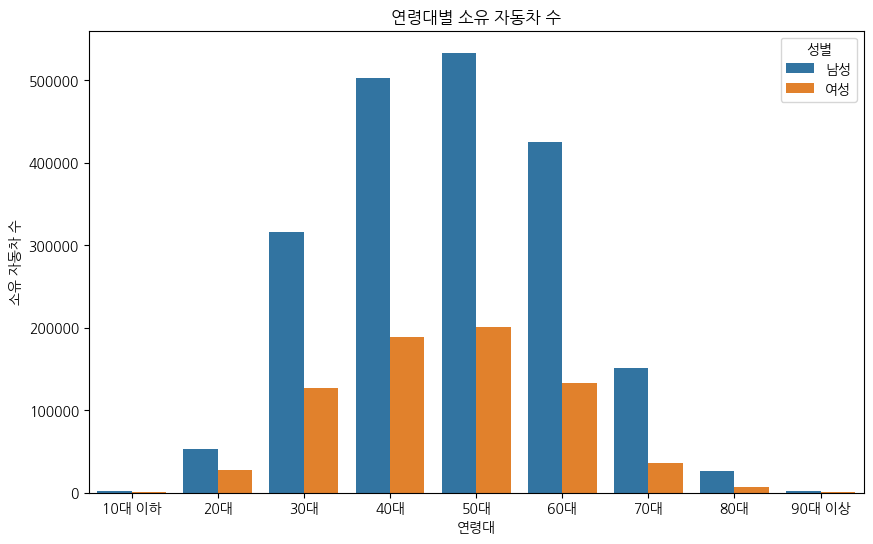

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='연령대', y='소유 자동차 수', hue='성별', data=df_car_age)
plt.title('연령대별 소유 자동차 수')
plt.xlabel('연령대')
plt.ylabel('소유 자동차 수')
plt.legend(title='성별')

# plt 최종
plt.show